In [1]:
import matplotlib.pyplot as plt
import torch
import numpy as np
import pandas as pd
import os
import random
from autoencoder import ae_encoding
from pca import pca_encoding

In [2]:
# Datasets (can be downloaded from the UCI repository or the sources cited in the paper)
df = pd.read_csv("/Users/dcac/Data/Soft_Sensors/debutanizer.csv")
# df = pd.read_csv("/Users/dcac/Data/Soft_Sensors/SRU2.csv")
# df = pd.read_csv("/Users/dcac/Data/UCI/air.csv")
# df = pd.read_csv("/Users/dcac/Data/UCI/bike.csv")
# df = pd.read_csv("/Users/dcac/Data/UCI/wine_white.csv")
# df = pd.read_csv("/Users/dcac/Data/UCI/gas_turbine_co.csv")
# df = pd.read_csv("/Users/dcac/Data/UCI/power1.csv")
# df = pd.read_csv("/Users/dcac/Data/UCI/wine_red.csv")

In [3]:
# Splitting into X and y
features = df.drop(["y"], axis=1)
y = df["y"]

In [4]:
# Extracting features
seed = 0
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
encoded_features_ae_sgd = ae_encoding(x=features, encoding_dim=2, learning_rate=0.01, num_epochs=1000, batch_size=32, optimizer=torch.optim.SGD)
encoded_features_ae_adam = ae_encoding(x=features, encoding_dim=2, learning_rate=0.01, num_epochs=1000, batch_size=32, optimizer=torch.optim.Adam)
encoded_features_pca = pca_encoding(x=features, encoding_dim=2)

Training: 100%|██████████| 1000/1000 [00:15<00:00, 62.97it/s, loss=0.398058]


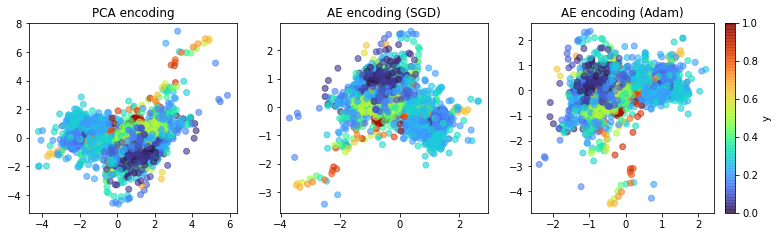

In [5]:
# Plotting results
fig, axs = plt.subplots(1, 3, figsize=(14, 3.5), gridspec_kw={'width_ratios': [1, 1, 1.1]})
pca_plot = axs[0].scatter(encoded_features_pca[:, 0], encoded_features_pca[:, 1], c=y, cmap='turbo', alpha=0.6)
axs[0].set_title('PCA encoding')
sgd_plot = axs[1].scatter(encoded_features_ae_sgd[:, 0], encoded_features_ae_sgd[:, 1], c=y, cmap='turbo', alpha=0.6)
axs[1].set_title('AE encoding (SGD)')
adam_plot = axs[2].scatter(encoded_features_ae_adam[:, 0], encoded_features_ae_adam[:, 1], c=y, cmap='turbo', alpha=0.6)
axs[2].set_title('AE encoding (Adam)')
cbar = fig.colorbar(adam_plot)
cbar.ax.set_ylabel('y')
fig.subplots_adjust(right=0.85)
plt.show()